# Myanmar Coup Fetality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [89]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [2]:
tables = camelot.read_pdf("Recent-Fatality-list-updated-on-May-25-2021-English.pdf", pages='1-end')
tables.n

50

In [72]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

In [73]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of \nIncident,Deceased \nDate,Organization,Place of \nIncidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko \nNyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 street, \nbetween 37 and \n38 street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old \nKo Na Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, \nLower \nPaunglaung \nHydro P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-\ncoup protests i..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, \nTanintharyi \nRegion,",Toe Chal Ward,Myeik,Tanintharyi \nRegion,"On 15 February evening, 18-year \nold Maung Na..."
4,4,Thet Naing Win @ \nMin Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar road, \nMandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,769,San Tun Aung Shwe \nHlaing @ Ngagar,M,,Unknown Name,23-May-21,24-May-21,Civilian,North Dagon \nfootball ground,,North Dagon,Yangon Region,Junta forces opened fire when \nthey raided th...
770,770,Zayar Win,M,36,Unknown Name,23-May-21,23-May-21,Civilian,,Phayarngarsu \nkangyi village,Myothit,Magwe Region,"On the night of 23 May, in \nrelation to bomb ..."
771,771,Soe Moe Hlaing @ \nMaegyi,M,55,Unknown Name,22 May 21 \narr,24-May-21,Former \nPolitical \nPrisoner,Interrogation \ncentre,Fayargyi,Bago,Bago Region,"Mae Gyi (a.k.a Soe Moe Hlaing), \na former mem..."
772,772,Min Min,M,,Unknown Name,24 May 21 \narrest,25-May-21,Civilian,Interrogation \ncentre,Myothar ward,Kela,Sagaing Region,A family was informed this \nmorning to collec...


## Cleanup data
Cleanup newline (\n)

In [74]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 street, between 37 and 38 street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region,",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,769,San Tun Aung Shwe Hlaing @ Ngagar,M,,Unknown Name,23-May-21,24-May-21,Civilian,North Dagon football ground,,North Dagon,Yangon Region,Junta forces opened fire when they raided the ...
770,770,Zayar Win,M,36,Unknown Name,23-May-21,23-May-21,Civilian,,Phayarngarsu kangyi village,Myothit,Magwe Region,"On the night of 23 May, in relation to bomb bl..."
771,771,Soe Moe Hlaing @ Maegyi,M,55,Unknown Name,22 May 21 arr,24-May-21,Former Political Prisoner,Interrogation centre,Fayargyi,Bago,Bago Region,"Mae Gyi (a.k.a Soe Moe Hlaing), a former membe..."
772,772,Min Min,M,,Unknown Name,24 May 21 arrest,25-May-21,Civilian,Interrogation centre,Myothar ward,Kela,Sagaing Region,A family was informed this morning to collect ...


Fix column names

In [75]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Adress', 'Township', 'States/Regions Remarks', ''],
      dtype=object)

In [76]:
header[-4] = 'Home Address'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [77]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 street, between 37 and 38 street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region,",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,5,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,769,San Tun Aung Shwe Hlaing @ Ngagar,M,,Unknown Name,23-May-21,24-May-21,Civilian,North Dagon football ground,,North Dagon,Yangon Region,Junta forces opened fire when they raided the ...
770,770,Zayar Win,M,36,Unknown Name,23-May-21,23-May-21,Civilian,,Phayarngarsu kangyi village,Myothit,Magwe Region,"On the night of 23 May, in relation to bomb bl..."
771,771,Soe Moe Hlaing @ Maegyi,M,55,Unknown Name,22 May 21 arr,24-May-21,Former Political Prisoner,Interrogation centre,Fayargyi,Bago,Bago Region,"Mae Gyi (a.k.a Soe Moe Hlaing), a former membe..."
772,772,Min Min,M,,Unknown Name,24 May 21 arrest,25-May-21,Civilian,Interrogation centre,Myothar ward,Kela,Sagaing Region,A family was informed this morning to collect ...


Drop unused columns

In [79]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address'])
dataset

,Sex,Age,Date of Incident,Deceased Date,Organization,Place of Incidents,Township,States/Regions,Remarks
1,M,32,08-Feb-21,08-Feb-21,Civilian,Mandalay,Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,F,19,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,M,18,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region,",Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,M,37,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,M,16,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...
769,M,,23-May-21,24-May-21,Civilian,North Dagon football ground,North Dagon,Yangon Region,Junta forces opened fire when they raided the ...
770,M,36,23-May-21,23-May-21,Civilian,,Myothit,Magwe Region,"On the night of 23 May, in relation to bomb bl..."
771,M,55,22 May 21 arr,24-May-21,Former Political Prisoner,Interrogation centre,Bago,Bago Region,"Mae Gyi (a.k.a Soe Moe Hlaing), a former membe..."
772,M,,24 May 21 arrest,25-May-21,Civilian,Interrogation centre,Kela,Sagaing Region,A family was informed this morning to collect ...


## Explore data

In [80]:
dataset.describe()

,Sex,Age,Date of Incident,Deceased Date,Organization,Place of Incidents,Township,States/Regions,Remarks
count,773,773,773,773,773,773,773,773,773
unique,3,63,90,83,64,293,146,36,259
top,M,,27-Mar-21,27-Mar-21,Civilian,,Hlaing Tharyar,Yangon Region,
freq,693,168,162,160,619,158,74,227,302


In [85]:
dataset.get('Sex').value_counts()

M    693
F     46
      34
Name: Sex, dtype: int64

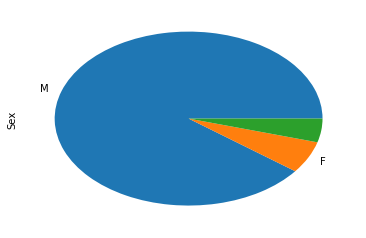

In [136]:
dataset.get('Sex').value_counts().plot(kind='pie')


In [108]:
dataset.get('Age').value_counts()

      168
19     39
20     35
30     30
25     27
     ... 
78      1
63      1
70      1
54      1
10      1
Name: Age, Length: 63, dtype: int64

(array([  2., 111., 210., 148.,  88.,  32.,  11.,   3.,   0.,   0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

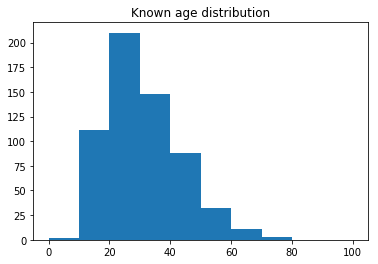

In [139]:
ages = dataset.get('Age').to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])